# First Look at the Data

### 1. Set up

The cell below will import all the packages required in the downstream analyses as well as set all the necessary variables and data paths.

In [3]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import numpy as np

import qiime2 as q2

%matplotlib inline

# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'project_data'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

To get the dataset required for the poject run the cell below:

Sequence:

Do not run this code it will bring you in trouble!

In [8]:
#! wget -nv -O $data_dir/sequence_data.qza 'https://polybox.ethz.ch/index.php/s/AsLORlvUbwgBWTq/download'

2022-10-06 16:48:01 URL:https://polybox.ethz.ch/index.php/s/AsLORlvUbwgBWTq/download [1506379068/1506379068] -> "project_data/sequence_data.qza" [1]


Sample metadata:

In [15]:
! wget -nv -O $data_dir/sample_meta_data.tsv 'https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download'

2022-10-06 17:00:27 URL:https://polybox.ethz.ch/index.php/s/QqbHeUIpIR0okB8/download [300302/300302] -> "project_data/sample_meta_data.tsv" [1]


In [5]:
df_meta_clean = pd.read_csv(f'{data_dir}/sample_meta_data.tsv', sep='\t')
df_meta_clean.shape

(523, 57)

In [6]:
df_meta_clean

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,NUT_probiotic_frequency,NUT_red_meat_frequency,NUT_salted_snacks_frequency,NUT_seafood_frequency,NUT_sugary_sweets_frequency,NUT_vegetable_frequency,NUT_vitamin_b_supplement_frequency,NUT_vitamin_d_supplement_frequency,NUT_whole_eggs,NUT_whole_grain_frequency
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,Rarely,Regularly,Occasionally,Rarely,Occasionally,Occasionally,Never,Never,Daily,Daily
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,Rarely,Rarely,Regularly,Occasionally,Regularly,Regularly,Never,Never,Rarely,Occasionally
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,Never,Occasionally,Daily,Occasionally,Rarely,Occasionally,Never,Never,Regularly,Occasionally
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,Daily,Occasionally,Rarely,Not provided,Rarely,Regularly,Daily,Daily,Rarely,Regularly
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,Regularly,Never,Never,Occasionally,Never,Daily,Rarely,Occasionally,Regularly,Daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,10317.000050,60s,65.0,Normal,22.48,False,2016-07-26 09:00:00,United Kingdom,False,41.4,...,Daily,Regularly,Not provided,Occasionally,Rarely,Daily,Never,Daily,Regularly,Never
519,10317.000046,20s,22.0,Normal,19.04,True,2016-05-17 18:45:00,Canada,True,NaN,...,Never,Never,Rarely,Never,Occasionally,Daily,Never,Never,Occasionally,Occasionally
520,10317.000053,60s,63.0,Normal,21.87,False,2016-08-02 20:00:00,United Kingdom,False,17.8,...,Occasionally,Occasionally,Rarely,Occasionally,Rarely,Daily,Never,Never,Occasionally,Occasionally
521,10317.000053,40s,49.0,Normal,18.84,False,2016-07-24 07:15:00,United Kingdom,False,69.9,...,Daily,Rarely,Never,Daily,Never,Daily,Never,Never,Daily,Never


Show all columns we have in our metadata:

In [7]:
df_meta_clean.columns.tolist()

['sampleid',
 'GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg',
 'NUT_alcohol_consumption',
 'NUT_alcohol_frequency',
 'NUT_alcohol_types_beercider',
 'NUT_alcohol_types_red_wine',
 'NUT_alcohol_types_sour_beers',
 'NUT_alcohol_types_spiritshard_alcohol',
 'NUT_alcohol_types_unspecified',
 'NUT_alcohol_types_white_wine',
 'NUT_artificial_sweeteners',
 'NUT_diet_type',
 'NUT_drinks_per_session',
 'NUT_fed_as_infant',
 'NUT_fermented_plant_frequency',
 'NUT_frozen_dessert_frequency',
 'NUT_fruit_frequency',
 'NUT_gluten',
 'NUT_high_fat_red_meat_frequency',
 'NUT_homecooked_meals_frequency',
 'NUT_lowgrain_diet_type',
 'NUT_meat_eggs_frequency',
 'NUT_mil

In [8]:
# check if we have replicates
len(df_meta_clean['sampleid'].unique())

523

In [7]:
# if we want sampleid as our index: 
#df_meta = pd.read_csv(f'{data_dir}/sample_meta_data.tsv', sep='\t', index_col=0)

We want to know what kind of samples we have:


In [9]:
df_meta_clean['GEN_sample_type'].value_counts()

Stool    523
Name: GEN_sample_type, dtype: int64

How many participants have cats or dogs?


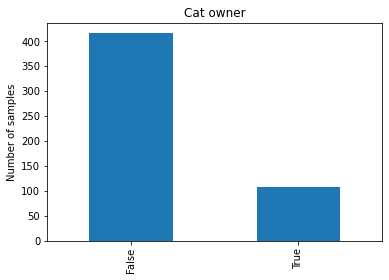

In [10]:
df_meta_clean['GEN_cat'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Cat owner')
plt.show()

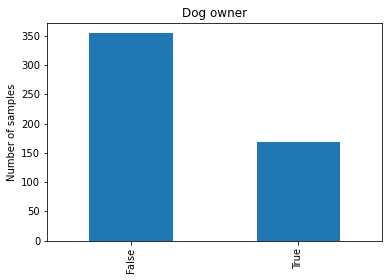

In [11]:
df_meta_clean['GEN_dog'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Dog owner')
plt.show()

In [12]:
#Maybe also remove rows NaN:

#df_meta[df_meta.isna().any(axis=1)]
#df.dropna()

# Check for missing data
df_meta_clean.isnull().sum()

sampleid                                  0
GEN_age_cat                               0
GEN_age_corrected                        31
GEN_bmi_cat                               0
GEN_bmi_corrected                        15
GEN_cat                                   0
GEN_collection_timestamp                  0
GEN_country                               0
GEN_dog                                   0
GEN_elevation                            35
GEN_geo_loc_name                          0
GEN_height_cm                             6
GEN_host_common_name                      0
GEN_last_move                             0
GEN_last_travel                           0
GEN_latitude                             35
GEN_level_of_education                    0
GEN_longitude                            35
GEN_race                                  0
GEN_sample_type                           0
GEN_sex                                   0
GEN_weight_kg                             5
NUT_alcohol_consumption         

We check:

In [15]:
len(df_meta_clean['sampleid'].unique())

523

In [17]:
df_meta_clean['GEN_sex'].value_counts()

female          300
male            219
Not provided      3
other             1
Name: GEN_sex, dtype: int64

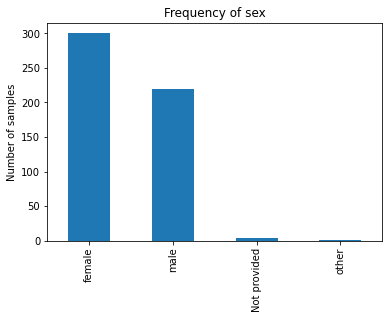

In [18]:
df_meta_clean['GEN_sex'].value_counts().plot(kind='bar')
plt.ylabel('Number of samples')
plt.title('Frequency of sex')
plt.show()

In [19]:
df_meta_clean['GEN_host_common_name'].value_counts()

human    523
Name: GEN_host_common_name, dtype: int64

Text(0.5, 1.0, 'Race')

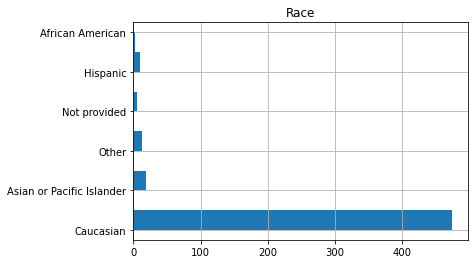

In [20]:
df_meta_clean['GEN_race'].hist(orientation='horizontal' )
plt.title('Race')

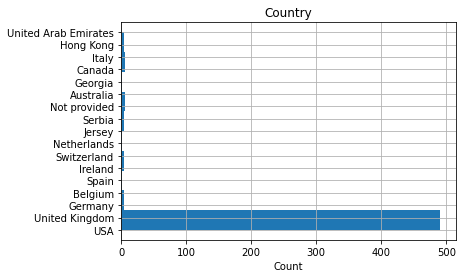

In [22]:
plt.hist('GEN_country', data=df_meta_clean, orientation='horizontal')
plt.xlabel('Count')
plt.title('Country')
plt.grid(True)
plt.show()

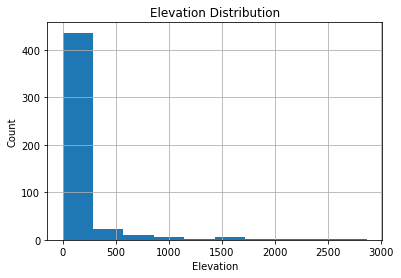

In [23]:
plt.hist('GEN_elevation', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Elevation')
plt.title('Elevation Distribution')
plt.grid(True)
plt.show()

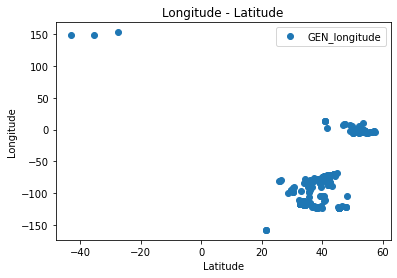

In [24]:
df_meta_clean.plot(x='GEN_latitude', y='GEN_longitude', style='o')
plt.ylabel('Longitude')
plt.xlabel('Latitude')
plt.title('Longitude - Latitude')
plt.show()

We note that most samples come from caucasians. Fruthermore, there are almost no samples from Switzerland which we should keep in mind when we aim to give suggestions to the ETH mensa chefs. Most of the samples come from USA, Germany and United Kingdom.

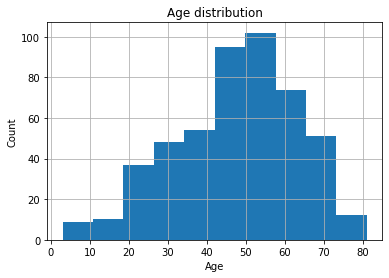

In [25]:
plt.hist('GEN_age_corrected', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Age distribution')
plt.grid(True)
plt.show()

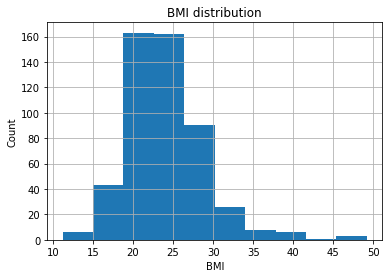

In [26]:
plt.hist('GEN_bmi_corrected', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('BMI')
plt.title('BMI distribution')
plt.grid(True)
plt.show()

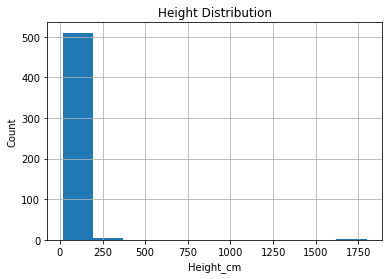

In [27]:
plt.hist('GEN_height_cm', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Height_cm')
plt.title('Height Distribution')
plt.grid(True)
plt.show()

In [44]:
I=df_meta_clean['GEN_height_cm'].max()
df_meta_clean.loc[df_meta_clean['GEN_height_cm'] == I].transpose()

,72
sampleid,10317.000053
GEN_age_cat,Not provided
GEN_age_corrected,NaN
GEN_bmi_cat,Not provided
GEN_bmi_corrected,NaN
GEN_cat,False
GEN_collection_timestamp,2016-07-26 15:30:00
GEN_country,United Kingdom
GEN_dog,False
GEN_elevation,10.8


Sample 10317.000053 is an outlier in the Height Distribution as he is 1800 cm height. (recording error and take out the sample of following analysis?)
We filtered out Samples with height larger than 300 cm.

In [60]:
df_meta_clean = df_meta_clean[df_meta_clean.GEN_height_cm < 300]

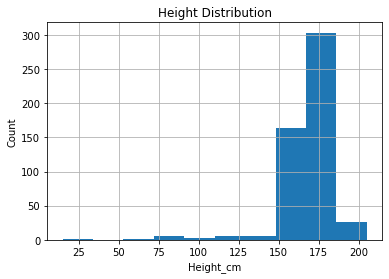

In [61]:
plt.hist('GEN_height_cm', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Height_cm')
plt.title('Height Distribution')
plt.grid(True)
plt.show()

In [62]:
df_meta_clean.shape

(514, 57)

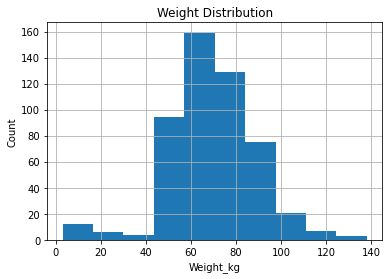

In [63]:
plt.hist('GEN_weight_kg', data=df_meta_clean)
plt.ylabel('Count')
plt.xlabel('Weight_kg')
plt.title('Weight Distribution')
plt.grid(True)
plt.show()

In [64]:
df_meta_clean['GEN_level_of_education'].value_counts()

Graduate or Professional degree         229
Bachelor's degree                       121
Some college or technical school         75
Some graduate school or professional     29
High School or GED equilivant            20
Not provided                             18
Did not complete high school             13
Associate's degree                        9
Name: GEN_level_of_education, dtype: int64

### Check correlations

Work only with GEN data, NUT data is explored in Eating_hbits file

In [65]:
names=df_meta_clean.columns
GEN_INDEX = names[df_meta_clean.columns.str.contains('GEN')]

df_GEN = df_meta_clean[GEN_INDEX]
df_GEN.head()

,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,GEN_geo_loc_name,...,GEN_host_common_name,GEN_last_move,GEN_last_travel,GEN_latitude,GEN_level_of_education,GEN_longitude,GEN_race,GEN_sample_type,GEN_sex,GEN_weight_kg
0,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,USA:CO,...,human,I have lived in my current state of residence ...,1 year,39.5,Some college or technical school,-105.1,Caucasian,Stool,male,86.0
1,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,United Kingdom:England,...,human,I have lived in my current state of residence ...,1 year,50.2,Some graduate school or professional,-5.5,Caucasian,Stool,female,63.0
2,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,United Kingdom:England,...,human,I have lived in my current state of residence ...,Month,53.4,Not provided,-2.3,Caucasian,Stool,male,90.0
3,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,Germany:HH,...,human,I have lived in my current state of residence ...,1 year,53.6,Graduate or Professional degree,10.0,Caucasian,Stool,female,53.0
4,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,United Kingdom:Unspecified,...,human,I have lived in my current state of residence ...,6 months,52.7,High School or GED equilivant,-1.2,Caucasian,Stool,female,60.0


In [66]:
df_GEN.shape

(514, 21)

In [67]:
df_GEN.columns.tolist()

['GEN_age_cat',
 'GEN_age_corrected',
 'GEN_bmi_cat',
 'GEN_bmi_corrected',
 'GEN_cat',
 'GEN_collection_timestamp',
 'GEN_country',
 'GEN_dog',
 'GEN_elevation',
 'GEN_geo_loc_name',
 'GEN_height_cm',
 'GEN_host_common_name',
 'GEN_last_move',
 'GEN_last_travel',
 'GEN_latitude',
 'GEN_level_of_education',
 'GEN_longitude',
 'GEN_race',
 'GEN_sample_type',
 'GEN_sex',
 'GEN_weight_kg']

In [68]:
df_GEN.dtypes

GEN_age_cat                  object
GEN_age_corrected           float64
GEN_bmi_cat                  object
GEN_bmi_corrected           float64
GEN_cat                        bool
GEN_collection_timestamp     object
GEN_country                  object
GEN_dog                        bool
GEN_elevation               float64
GEN_geo_loc_name             object
GEN_height_cm               float64
GEN_host_common_name         object
GEN_last_move                object
GEN_last_travel              object
GEN_latitude                float64
GEN_level_of_education       object
GEN_longitude               float64
GEN_race                     object
GEN_sample_type              object
GEN_sex                      object
GEN_weight_kg               float64
dtype: object

In [69]:
df_GEN_cont = df_GEN.select_dtypes(include=['float64'])
df_GEN_cat = df_GEN.select_dtypes(include=['object'])

In [70]:
df_GEN_cont.describe()

,GEN_age_corrected,GEN_bmi_corrected,GEN_elevation,GEN_height_cm,GEN_latitude,GEN_longitude,GEN_weight_kg
count,490.000000,508.000000,480.000000,514.000000,480.000000,480.000000,510.000000
mean,47.465306,24.124213,156.913333,168.215953,44.762083,-47.431875,69.486275
std,15.795337,4.894094,329.633056,18.035325,9.993573,54.284457,19.093782
min,3.000000,11.200000,-0.900000,15.000000,-43.000000,-157.800000,3.000000
25%,37.000000,20.800000,25.200000,162.000000,38.900000,-104.075000,58.000000
50%,49.000000,23.505000,60.750000,170.000000,48.700000,-3.900000,69.000000
75%,59.000000,26.545000,128.425000,178.000000,51.600000,-0.600000,81.000000
max,81.000000,49.190000,2864.300000,205.000000,57.500000,153.000000,138.000000


In [71]:
df_GEN_cat.describe()

,GEN_age_cat,GEN_bmi_cat,GEN_collection_timestamp,GEN_country,GEN_geo_loc_name,GEN_host_common_name,GEN_last_move,GEN_last_travel,GEN_level_of_education,GEN_race,GEN_sample_type,GEN_sex
count,514,514,514,514,514,514,514,514,514,514,514,514
unique,9,5,497,17,62,1,6,6,8,6,1,4
top,50s,Normal,2016-08-01 08:00:00,United Kingdom,United Kingdom:England,human,I have lived in my current state of residence ...,I have not been outside of my country of resid...,Graduate or Professional degree,Caucasian,Stool,female
freq,121,274,5,249,165,514,468,164,229,465,514,295


Save cleaned Data in CSV to be able to reload it in next tasks:

In [72]:
df_meta_clean.to_csv(f'{data_dir}/cleaned_sample_meta_data.tsv', sep='\t')

Save the cleaned meta data for furhter data analysis.